In [21]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import time
from data_import import *
from graph_manipulation import *
from time_aware_splits import *
from popularity_based_rec import *
from personalized_prank import *
from pathsim import *
from simrank import *
from accuracy_evaluation import *
from collections import defaultdict
from collections import Counter
from operator import itemgetter
from background_jobs import create_graph
import pandas as pd
import networkx as nx
from collections import defaultdict
import plotly.graph_objs as go
from datetime import datetime
import numpy as np
import datetime
import itertools
import copy
import sys
from time import sleep
from collections import defaultdict
import matplotlib.cm as cm

from pyvis.network import Network as pyvisNet

Graph creation

In [2]:
G = nx.Graph()
pyvis_network = pyvisNet(notebook=True,width = 1000)
patients = ['Patient1', 'Patient2', 'Patient3']
node_color = []
for patient in patients:
    node_color.append("#00ff1e")
pyvis_network.add_nodes(patients,label=patients,color=node_color)

drugs = ['Drug1', 'Drug2', 'Drug3', 'Drug4','Drug5','Drug6','Drug7']
node_color = []
for drug in drugs:
    node_color.append("#162347")
pyvis_network.add_nodes(drugs,label=drugs, color = node_color)
treatments = ['T'+str(i) for i in range(1,7)]
node_color = []
for treatment in treatments:
    node_color.append("#dd4b39")
pyvis_network.add_nodes(treatments,label=treatments,color = node_color)
G.add_nodes_from(patients, entity='P')
G.add_nodes_from(drugs, entity='D')
for treatment in treatments[:3]:
    treatment_start = pd.to_datetime('2016-06-30 09:30:00')
    G.add_node(treatment,datetime = treatment_start, entity='T')
for treatment in treatments[3:]:
    treatment_start = pd.to_datetime('2017-01-30 09:30:00')
    G.add_node(treatment,datetime = treatment_start, entity='T')
G.add_node('T8',datetime= pd.to_datetime('2016-01-30 09:30:00'),entity = 'T')

In [3]:
# --- Patients - Treatments
for i in (0,3):
    G.add_edge('Patient1', treatments[i], type='PT')
    pyvis_network.add_edge('Patient1', treatments[i])
for i in (1,4):
    G.add_edge('Patient2', treatments[i], type='PT')
    pyvis_network.add_edge('Patient2', treatments[i])
for i in (2,5):
    G.add_edge('Patient3', treatments[i], type='PT')
    pyvis_network.add_edge('Patient3', treatments[i])


In [4]:
# --- Treatments - Drugs
for i in [0]:
    G.add_edge(treatments[i], 'Drug1', type='TD',reading_datetime = pd.to_datetime('2016-06-30 09:30:00'))
    G.add_edge(treatments[i], 'Drug2', type='TD',reading_datetime = pd.to_datetime('2016-06-30 09:31:00'))
    G.add_edge(treatments[i], 'Drug3', type='TD',reading_datetime = pd.to_datetime('2016-06-30 09:32:00'))
    G.add_edge(treatments[i], 'Drug4', type='TD', reading_datetime=pd.to_datetime('2016-06-30 09:33:00'))
    pyvis_network.add_edge(treatments[i], 'Drug1')
    pyvis_network.add_edge(treatments[i], 'Drug2')
    pyvis_network.add_edge(treatments[i], 'Drug3')
    pyvis_network.add_edge(treatments[i], 'Drug4')
for i in [1]:
    G.add_edge(treatments[i], 'Drug1', type='TD',reading_datetime = pd.to_datetime('2016-06-30 09:30:00'))
    G.add_edge(treatments[i], 'Drug2', type='TD',reading_datetime = pd.to_datetime('2016-06-30 09:31:00'))
    G.add_edge(treatments[i], 'Drug3', type='TD',reading_datetime = pd.to_datetime('2016-06-30 09:33:00'))
    G.add_edge(treatments[i], 'Drug4', type='TD',reading_datetime = pd.to_datetime('2016-06-30 09:32:00'))
    G.add_edge(treatments[i], 'Drug5', type='TD', reading_datetime=pd.to_datetime('2016-06-30 09:34:00'))
    G.add_edge(treatments[i], 'Drug7', type='TD', reading_datetime=pd.to_datetime('2016-06-30 09:35:00'))
    pyvis_network.add_edge(treatments[i], 'Drug1')
    pyvis_network.add_edge(treatments[i], 'Drug2')
    pyvis_network.add_edge(treatments[i], 'Drug3')
    pyvis_network.add_edge(treatments[i], 'Drug4')
    pyvis_network.add_edge(treatments[i], 'Drug5')
    pyvis_network.add_edge(treatments[i], 'Drug7')
for i in [2]:
    G.add_edge(treatments[i], 'Drug1', type='TD',reading_datetime = pd.to_datetime('2016-06-30 09:30:00'))
    G.add_edge(treatments[i], 'Drug2', type='TD',reading_datetime = pd.to_datetime('2016-06-30 09:31:00'))
    G.add_edge(treatments[i], 'Drug5', type='TD',reading_datetime = pd.to_datetime('2016-06-30 09:32:00'))
    G.add_edge(treatments[i], 'Drug6', type='TD', reading_datetime=pd.to_datetime('2016-06-30 09:33:00'))
    pyvis_network.add_edge(treatments[i], 'Drug1')
    pyvis_network.add_edge(treatments[i], 'Drug2')
    pyvis_network.add_edge(treatments[i], 'Drug5')
    pyvis_network.add_edge(treatments[i], 'Drug6')

for i in [3]:
    G.add_edge(treatments[i], 'Drug1', type='TD',reading_datetime = pd.to_datetime('2017-01-30 09:30:00'))
    G.add_edge(treatments[i], 'Drug2', type='TD',reading_datetime = pd.to_datetime('2017-01-30 09:31:00'))
    G.add_edge(treatments[i], 'Drug3', type='TD',reading_datetime = pd.to_datetime('2017-01-30 09:32:00'))
    pyvis_network.add_edge(treatments[i], 'Drug1')
    pyvis_network.add_edge(treatments[i], 'Drug2')
    pyvis_network.add_edge(treatments[i], 'Drug3')

for i in [4]:
    G.add_edge(treatments[i], 'Drug1', type='TD',reading_datetime = pd.to_datetime('2017-01-30 09:30:00'))
    G.add_edge(treatments[i], 'Drug2', type='TD',reading_datetime = pd.to_datetime('2017-01-30 09:31:00'))
    G.add_edge(treatments[i], 'Drug3', type='TD',reading_datetime = pd.to_datetime('2017-01-30 09:33:00'))
    G.add_edge(treatments[i], 'Drug4', type='TD',reading_datetime = pd.to_datetime('2017-01-30 09:32:00'))
    G.add_edge(treatments[i], 'Drug5', type='TD', reading_datetime=pd.to_datetime('2017-01-30 09:35:00'))
    pyvis_network.add_edge(treatments[i], 'Drug1')
    pyvis_network.add_edge(treatments[i], 'Drug2')
    pyvis_network.add_edge(treatments[i], 'Drug3')
    pyvis_network.add_edge(treatments[i], 'Drug4')
    pyvis_network.add_edge(treatments[i], 'Drug5')

for i in [5]:
    G.add_edge(treatments[i], 'Drug1', type='TD',reading_datetime = pd.to_datetime('2017-01-30 09:30:00'))
    G.add_edge(treatments[i], 'Drug2', type='TD',reading_datetime = pd.to_datetime('2017-01-30 09:31:00'))
    G.add_edge(treatments[i], 'Drug5', type='TD',reading_datetime = pd.to_datetime('2017-01-30 09:32:00'))
    G.add_edge(treatments[i], 'Drug3', type='TD',reading_datetime = pd.to_datetime('2017-01-30 09:33:00'))
    pyvis_network.add_edge(treatments[i], 'Drug1')
    pyvis_network.add_edge(treatments[i], 'Drug2')
    pyvis_network.add_edge(treatments[i], 'Drug5')
    pyvis_network.add_edge(treatments[i], 'Drug3')




In [5]:
toy_example = True
dataset = 'medical' #posssible values : Adressa,german_news, italian_news, german_tvbroadcasts, medical
edge_type = 'edge_type'
if toy_example:
    custom_user = 'P'
    custom_session = 'T'
    custom_article = 'D'
    edge_type = 'type'
else:
    G = nx.read_gpickle(f'./Data/{dataset}.gpickle')#Comment this out if you want to run the toy example
if dataset =='medical':
    custom_user = 'P'
    custom_session = 'T'
    custom_article = 'D'
else:
    custom_user = 'U'
    custom_session = 'S'
    custom_article = 'A'

In [6]:
# Show nodes and edges of Graph
entities = []
for entity in G._node:
    if G._node[entity]['entity'] in entities:
        1
    else:
        entities.append(G._node[entity]['entity'])
pos = nx.spring_layout(G)
color_dict = {}
edges_list = []
for i in range(0,len(entities)):
    color_dict[list(entities)[i]] = 1/len(entities) * i
values = [color_dict.get(node[0],0.25) for node in G.nodes()]

In [7]:
print(entities)

['P', 'D', 'T']


In [8]:
pyvis_g = pyvisNet(notebook=True,width=1000)
pyvis_g.from_nx(G)


In [9]:
pyvis_network.show("mygraph.html")

In [10]:
# Set Graph Size for the remainder of notebook
plt.clf()
fig_size = (12,6)
plt.rcParams["figure.figsize"] = fig_size

<Figure size 432x288 with 0 Axes>

In [11]:
def get_possible_metapaths(subgraphs):
    metapaths=[]
    def metapath_length_two(subgraph):
        temp_metapath_list = []
        for i in range(0,len(subgraph)):
            start_node = subgraph[i]
            end_node = subgraph[1-i]
            metapath_name = f'{start_node}_{end_node}_{start_node}'
            metapath_length = 1
            if metapath_name in metapaths:
                1
            else:
                metapaths.append(metapath_name)
                temp_metapath_list.append(dict(start_node=start_node,end_node=end_node,metapath_name=metapath_name,length=metapath_length,subgraph=subgraph))
        return temp_metapath_list
    def metapath_length_three(subgraph):
        temp_metapath_list = []
        for i in [0,2]:
            start_node = subgraph[i]
            temp_node = subgraph[1]
            end_node = subgraph[2 - i]
            metapath_name = f'{start_node}_{temp_node}_{end_node}_{temp_node}_{start_node}'
            metapath_length = 2
            temp_metapath_list.append(
                dict(start_node=start_node, end_node=end_node, metapath_name=metapath_name, length=metapath_length,subgraph=subgraph))
        return temp_metapath_list
    metapath_dict = []
    for subgraph in subgraphs:
        if len(subgraph)==2:
            metapath_dict.extend(metapath_length_two(subgraph))
        elif len(subgraph)==3:
            metapath_dict.extend(metapath_length_three(subgraph))
    return metapath_dict

In [12]:

gm = GraphManipulation()
gm.G = G
patients = [n for n, attr in G.nodes(data=True) if attr['entity'] == custom_user]
print(f' Number of patients {len(patients)}')
methods = ['PathCount']#PathCount,Pathsim,RWR,POP,Simrank

nodes = [custom_user,custom_session,custom_article,'C']
min_items_n = 3
number_splits = 12
short_days = 2
print_output = 1
number_recommendations = 3
# print(methods)
possible_subgraphs = [(custom_user,custom_article),(custom_session,custom_article),(custom_user,custom_session),
                      (custom_user,custom_session,custom_article),(custom_user,custom_session,custom_article,'C')]
weighted_strategy_method = 1 #options are 1 - normal mean,
                             #2 - weighted mean (sigmoid)
possible_metapaths=[]
explainability = defaultdict(list)
subgraphs =[]
for length in range(2,len(nodes)+1):
    x = list(itertools.permutations(nodes,length))
    for item in x:
        if item in possible_subgraphs:
            subgraphs.append(item)
possible_metapaths = []
possible_metapaths.extend(get_possible_metapaths(subgraphs))
# print(subgraphs)
# gm.filter_users(gm.G, n_sessions=min)
gm.G = G
gm.filter_sessions(gm.G, n_items=min_items_n)

 Number of patients 3


KeyError: 'edge_type'

In [13]:
e = ""
e+=(f'\nGENERAL STATISTICS')
e+=(f'\nNumber of patients:{len(gm.get_nodes(G,custom_user))}')
e +=(f'\nNumber of treatments:{len(gm.get_nodes(G,custom_session))}')
e +=(f'\nNumber of drugs:{len(gm.get_nodes(G,custom_article))}')


art_per_session = gm.get_articles_per_session(gm.G,custom_session)
e +=(f'\nAvg number of drugs per session:{round(np.mean(art_per_session), 2)}')
e +=(f'\nMax number of drugs per session:{round(np.max(art_per_session), 2)}')

ses_per_user = gm.get_sessions_per_user(gm.G,custom_user)
e +=(f'\nAvg number of treatments per patient:{round(np.mean(ses_per_user), 2)}')
e +=(f'\nMax number of treatments per patient:{round(np.max(ses_per_user), 2)} ')
print (e)
#Create time splits based on treatments
tas = TimeAwareSplits(G,session_entity_prefix= custom_session)
tas.create_time_split_graphs(G, num_splits=number_splits)
tas.create_time_window_graphs(short_days)
short_back_timedelta = datetime.timedelta(days=short_days)



GENERAL STATISTICS
Number of patients:3
Number of treatments:5
Number of drugs:7
Avg number of drugs per session:4.6
Max number of drugs per session:6
Avg number of treatments per patient:1.67
Max number of treatments per patient:2 


In [14]:
tas.time_window_graph_list


[(<networkx.classes.graph.Graph at 0x7fe15da14650>,
  Timestamp('2016-08-05 01:30:00'),
  Timestamp('2016-08-22 21:30:00')),
 (<networkx.classes.graph.Graph at 0x7fe15da14450>,
  Timestamp('2016-08-22 21:30:00'),
  Timestamp('2016-09-09 17:30:00')),
 (<networkx.classes.graph.Graph at 0x7fe15da14510>,
  Timestamp('2016-09-09 17:30:00'),
  Timestamp('2016-09-27 13:30:00')),
 (<networkx.classes.graph.Graph at 0x7fe15d8fad50>,
  Timestamp('2016-09-27 13:30:00'),
  Timestamp('2016-10-15 09:30:00')),
 (<networkx.classes.graph.Graph at 0x7fe15ce44190>,
  Timestamp('2016-10-15 09:30:00'),
  Timestamp('2016-11-02 05:30:00')),
 (<networkx.classes.graph.Graph at 0x7fe15d8fa610>,
  Timestamp('2016-11-02 05:30:00'),
  Timestamp('2016-11-20 01:30:00')),
 (<networkx.classes.graph.Graph at 0x7fe15d8fa3d0>,
  Timestamp('2016-11-20 01:30:00'),
  Timestamp('2016-12-07 21:30:00')),
 (<networkx.classes.graph.Graph at 0x7fe15d8fa150>,
  Timestamp('2016-12-07 21:30:00'),
  Timestamp('2016-12-25 17:30:00')),


In [15]:


_dump_process = True

e +=(f'\n\nTime span list:\n')
counter = 0
for timespan in tas.time_span_list:

    e+=(f'{timespan}\n')
    counter+=1
    if counter>1:
        counter=0
ae = AccuracyEvaluation(G,number_recommendations=number_recommendations,edge_type = edge_type)

train_set_len = []
train_len_dict = defaultdict(list)
n_articles_train = []
n_recommendation = dict()
sessions_per_user_in_short_term = []
avg_ses_len = defaultdict(list)
train_set_len = []
train_len_dict = defaultdict(list)
n_articles_train = []
n_recommendation = dict()
sessions_per_user_in_short_term = []
avg_ses_len = defaultdict(list)

In [22]:
print(nx.__version__)

2.4




======= Time split0 =======


======= Time split1 =======


======= Time split2 =======


======= Time split3 =======


======= Time split4 =======


======= Time split5 =======


======= Time split6 =======


======= Time split7 =======


======= Time split8 =======


======= Time split9 =======

Patient : Patient2

Drugs ['Drug1', 'Drug2', 'Drug4', 'Drug3', 'Drug5'] of treatment T5 for patient Patient2

Drugs used for prediction :['Drug1', 'Drug2', 'Drug4']

Next Drug to be predicted: Drug3

PathCount_P_T_P_rec: [] 
PathCount_T_P_T_rec: [] 
PathCount_P_D_P_rec: [] 
PathCount_D_P_D_rec: [**Drug3**, Drug5] 
PathCount_T_D_T_rec: [Drug1, Drug2, **Drug3**] 
PathCount_D_T_D_rec: [**Drug3**, Drug5] 
PathCount_P_T_D_T_P_rec: [] 
PathCount_D_T_P_T_D_rec: [**Drug3**, Drug5] 
PathCount_combined_rec: [**Drug3** explained by D_P_D: 5 T_D_T: 0.25 D_T_D: 5 D_T_P_T_D: 5 sum: 15.25 , Drug5 explained by D_P_D: 5 D_T_D: 5 D_T_P_T_D: 5 sum: 15.0 , Drug2 explained by T_D_T: 0.25 sum: 0.25 ] 


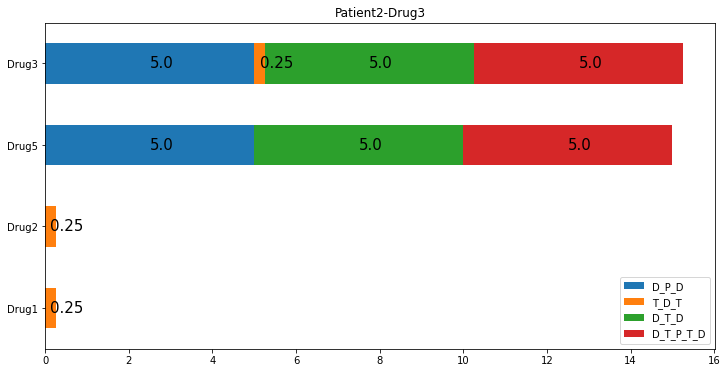

Drugs used for prediction :['Drug1', 'Drug2', 'Drug4', 'Drug3']

Next Drug to be predicted: Drug5

PathCount_P_T_P_rec: [] 
PathCount_T_P_T_rec: [] 
PathCount_P_D_P_rec: [] 
PathCount_D_P_D_rec: [**Drug5**] 
PathCount_T_D_T_rec: [Drug1, Drug2, Drug3] 
PathCount_D_T_D_rec: [**Drug5**] 
PathCount_P_T_D_T_P_rec: [] 
PathCount_D_T_P_T_D_rec: [**Drug5**] 
PathCount_combined_rec: [**Drug5** explained by D_P_D: 7 D_T_D: 7 D_T_P_T_D: 7 sum: 21.0 , Drug2 explained by T_D_T: 0.25 sum: 0.25 , Drug3 explained by T_D_T: 0.25 sum: 0.25 ] 


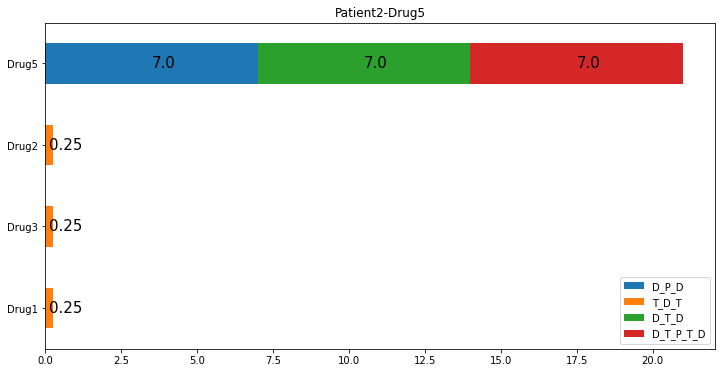


Patient : Patient3

Drugs ['Drug1', 'Drug2', 'Drug5', 'Drug3'] of treatment T6 for patient Patient3

Drugs used for prediction :['Drug1', 'Drug2', 'Drug5']

Next Drug to be predicted: Drug3

PathCount_P_T_P_rec: [] 
PathCount_T_P_T_rec: [] 
PathCount_P_D_P_rec: [] 
PathCount_D_P_D_rec: [**Drug3**, Drug4] 
PathCount_T_D_T_rec: [Drug1, Drug2, **Drug3**] 
PathCount_D_T_D_rec: [**Drug3**, Drug4] 
PathCount_P_T_D_T_P_rec: [] 
PathCount_D_T_P_T_D_rec: [**Drug3**, Drug4] 
PathCount_combined_rec: [**Drug3** explained by D_P_D: 6 T_D_T: 0.25 D_T_D: 6 D_T_P_T_D: 6 sum: 18.25 , Drug4 explained by D_P_D: 3 D_T_D: 3 D_T_P_T_D: 3 sum: 9.0 , Drug1 explained by T_D_T: 0.25 sum: 0.25 ] 


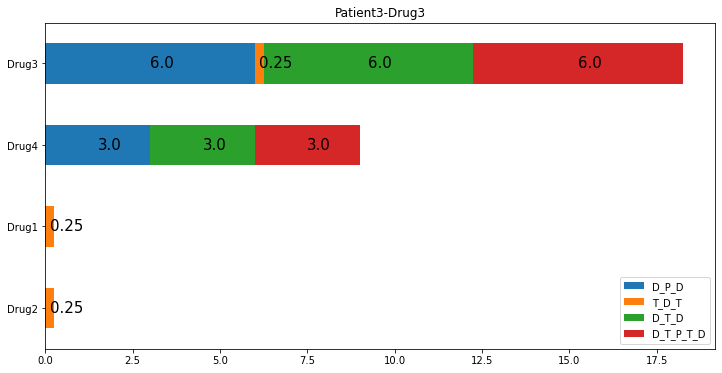

In [16]:
for tw_i, tw_iter in enumerate(tas.time_window_graph_list):
    print(f'\n\n======= Time split{tw_i} =======')
            
    n_recommendation[tw_i] = 0
    n_recommendation[f'{tw_i}_correct'] = 0
    # long_train_g = tw_iter[0]
    tw_iter[1].frozen = False
    test_g = tw_iter[1].copy()
    
    test_treatments = sorted(
        [(s, attr['datetime']) for s, attr in test_g.nodes(data=True) if attr['entity'] == custom_session],
        key=lambda x: x[1])
    for (s, s_datetime) in test_treatments:
        #         print([n for n in nx.neighbors(test_g,s)])
        #         print(test_g.get_edge_data(s,'P1'))
        user = [n for n in nx.neighbors(test_g, s) if test_g.get_edge_data(s, n)[edge_type] == f'{custom_user}{custom_session}'][0]
        test_session_G = nx.Graph()
        test_session_G.add_node(user, entity=custom_user)
        test_session_G.add_node(s, entity=custom_session)
        test_session_G.add_edge(user, s, edge_type=f'{custom_user}{custom_session}')
        drugs = sorted([n for n in nx.neighbors(test_g, s) if test_g.get_edge_data(s, n)[edge_type] == f'{custom_session}{custom_article}'],
                       key=lambda x: test_g.get_edge_data(s, x)['reading_datetime'])
        
        print(f'\nPatient : {user}')
        print(f'\nDrugs {drugs} of treatment {s} for patient {user}\n')
        
        for i in range(min_items_n, len(drugs)):
            e=''
            methods_to_be_evaluated = []
            methos_to_be_evaluated_explainable = []
            # short_train_g = tas.create_short_term_train_set(s_datetime, short_back_timedelta,
            #                                                 test_session_graph=test_session_G)
            train_start = s_datetime - short_back_timedelta
            train_end = s_datetime

            temp_sessions = [n for n, attr in G.nodes(data=True)
                             if attr['entity'] == custom_session
                             and attr['datetime'] >= train_start
                             and attr['datetime'] <= train_end]

            # temp_neighbors = []
            # for s in temp_sessions:
            #     temp_neighbors.extend(nx.neighbors(self.G, s))
            #
            # temp_neighbors = list(set(temp_neighbors))
            #
            # categories = [n for n, attr in self.G.nodes(data=True) if attr['entity'] == 'C']

            temp_users = []
            temp_articles = []
            for session_test in temp_sessions:
                temp_users.extend([u for u in G[session_test] if G[session_test][u][edge_type] == f'{custom_user}{custom_session}'])
                temp_articles.extend([a for a in G[session_test] if G[session_test][a][edge_type] == f'{custom_session}{custom_article}'])

            temp_users = list(set(temp_users))
            temp_articles = list(set(temp_articles))

            temp_categories = []
            for a in temp_articles:
                temp_categories.extend([c for c in G[a] if G[a][c][edge_type] == f'{custom_article}C'])

            temp_categories = list(set(temp_categories))

            temp_locations = []
            for a in temp_articles:
                temp_locations.extend([l for l in G[a] if G[a][l][edge_type] == f'{custom_article}E'])

                temp_locations = list(set(temp_locations))

            temp_nodes = []
            temp_nodes.extend(temp_sessions)
            # temp_nodes.extend(temp_neighbors)
            # temp_nodes.extend(categories)
            temp_nodes.extend(temp_users)
            temp_nodes.extend(temp_articles)
            temp_nodes.extend(temp_categories)
            temp_nodes.extend(temp_locations)

            short_train_subgraph = G.subgraph(temp_nodes)


            short_train_subgraph = nx.compose(short_train_subgraph, test_session_G)

            short_train_g =  short_train_subgraph
            if len(short_train_g) == 0:
                continue
            test_session_G.add_nodes_from(drugs[:i], entity=custom_article)
            for d in drugs[:i]:
                test_session_G.add_edge(s, d, edge_type=f'{custom_session}{custom_article}')
            # ptd_train = gm.create_subgraph_of_adjacent_entities(short_train_g,list_of_entities=['P','T','D'])
            subgraphs_train = []
            subgraph_dict = {}
            for subgraph in subgraphs:
                if len(subgraph) == 2:
                    if subgraph==(custom_user, custom_article):
                        path_len = 2
                    else:
                        path_len = 1

                    derived_graph =gm.derive_adjacency_multigraph(short_train_g,entity1=subgraph[0][0],entity2=subgraph[1],path_len=path_len)
                    subgraph_dict[subgraph] = derived_graph
                    subgraphs_train.append((derived_graph,
                                            f'{subgraph[0]}_{subgraph[1]}',subgraph))
                elif len(subgraph) == 3:


                    derived_graph = gm.create_subgraph_of_adjacent_entities(short_train_g,
                                                            list_of_entities=[
                                                                subgraph[0],
                                                                subgraph[1], subgraph[2]])
                    subgraph_dict[subgraph] = derived_graph
                    subgraphs_train.append((derived_graph,
                                            f'{subgraph[0]}_{subgraph[1]}_{subgraph[2]}',subgraph))
                elif len(subgraph) == 4:

                    derived_graph = gm.create_subgraph_of_adjacent_entities(short_train_g,
                                                                                    list_of_entities=[
                                                                                        subgraph[0],
                                                                                        subgraph[1],
                                                                                        subgraph[2], subgraph[3]])
                    subgraph_dict[subgraph] = derived_graph
                    subgraphs_train.append((derived_graph,
                                            f'{subgraph[0]}_{subgraph[1]}_{subgraph[2]}_{subgraph[3]}',subgraph))
                else:

                    derived_graph = gm.create_subgraph_of_adjacent_entities(short_train_g,
                                                                                    list_of_entities=[
                                                                                        subgraph[0],
                                                                                        subgraph[1],
                                                                                        subgraph[2],
                                                                                        subgraph[3], subgraph[4]])
                    subgraph_dict[subgraph] = derived_graph
                    subgraphs_train.append((derived_graph,
                                            f'{subgraph[0]}_{subgraph[1]}_{subgraph[2]}_{subgraph[3]}_{subgraph[4]}',subgraph))
            
            if 'POP' in methods:
                pop = PopularityBasedRec(G, number_recommendations)
                pop.compute_pop(short_train_g)
                pop_rec = pop.predict_next(user, drugs[:i])

                #                         if len(pop_rec) == 0:
                #                             continue
                #                         else:
                methods_to_be_evaluated.append((pop_rec, 'POP'))

                # ------- SimRank ----------------------
            if 'Simrank' in methods:
                simrank_models = []
                for subgraph_train in subgraphs_train:
                    simrank = SimRankRec(number_recommendations,custom_user,custom_session,custom_article)
                    simrank.compute_similarity_matrix(subgraph_train[0], max_iter=10,result_type=custom_article)
                    simrank_models.append((simrank, subgraph_train[1]))
                for simrank_model in simrank_models:
                    recommendation = simrank_model[0].predict_next(user, drugs[:i], method=weighted_strategy_method,)
                    #                             if len(recommendation) == 0:
                    #                                 continue
                    #                             else:
#                     print(f'Recommendation : {recommendation}')
                    methods_to_be_evaluated.append((recommendation, f'Simrank_{simrank_model[1]}'))

                    # ------- RWR --------------------------
            if 'RWR' in methods:
                rwr_models = []
                for subgraph_train in subgraphs_train:
                    RWR = PersonalizedPageRankBasedRec(number_recommendations,custom_user,custom_session,custom_article)
                    RWR.compute_transition_matrix(subgraph_train[0])
                    RWR.create_itemitem_matrix()
                    rwr_models.append((RWR, subgraph_train[1]))
                for rwr_model in rwr_models:
                    recommendation = rwr_model[0].predict_next(user, drugs[:i],method=weighted_strategy_method)
                    #                             if len(recommendation) == 0:
                    #                                 continue
                    #                             else:
                    methods_to_be_evaluated.append((recommendation, f'RWR_{rwr_model[1]}'))
            if 'Pathsim' in methods:
                pathsim_models = []
                #for subgraph_train in subgraphs_train:

                #nodes = subgraph_train[1].split('_')
                for metapath in possible_metapaths:
                        pathsim = PathSimRec(number_recommendations)
                            #if f'A_{node}_A' not in metapaths_a:
                        start_node = metapath['start_node']
                        end_node = metapath['end_node']
                        metapath_name= metapath['metapath_name']
                        length = metapath['length']
                        pathsim.compute_similarity_matrix(subgraph_dict[metapath['subgraph']], start_node, end_node, length)
                        #pathsim_models.append((pathsim, f'Pathsim_{metapath_name}'))
                        #metapaths_a.append(f'A_{node}_A')
                    #if ('U' in nodes) and ('S' in nodes) and ('A' in nodes):
                        # pathsim.compute_similarity_matrix(short_train_g, 'A', 'U', 2)
                        # pathsim_models.append((pathsim, f'Pathsim_M_S_U_S_M'))
                # for pathsim_model in pathsim_models:

                        if metapath['start_node']==custom_user:
                            similar_users = pathsim.get_similar_users(user, gm.get_users(subgraph_dict[metapath['subgraph']]))
                            recommendation = pathsim.predict_next_by_UB(similar_users, drugs[:i], subgraph_dict[metapath['subgraph']], topN=True)
                        elif metapath['start_node']==custom_session:
                            recommendation = pathsim.predict_next_by_SB(s, treatments[:i], topN=True,type=f'{custom_session}{custom_article}')
                        elif metapath['start_node'] == custom_article:
                            recommendation = pathsim.predict_next_by_AB(drugs[:i], option='sb', topN=True)
                        # recommendation = pathsim.predict_next(user, drugs[:i], method=2)
                        #                                 if len(recommendation)==0:
                        #                                     continue
                        #                                 else:
                        methods_to_be_evaluated.append((recommendation, f'Pathsim_{metapath_name}'))
            
            if 'PathCount' in methods:
                pathcounts = []
                pathcount_models = []
                ab_rec = []
                sb_rec = []

                # if 'A' in nodes:
                #     # for path_len in range(1,len(nodes)-1):
                #     for node in nodes:
                #         if node != 'A':
                #             if f'A_{node}_A' not in pathcounts:
                
                for metapath in possible_metapaths:
                    start_node = metapath['start_node']
                    end_node = metapath['end_node']
                    metapath_name = metapath['metapath_name']
                    pathcounts.append(metapath_name)
                    length = metapath['length']
                    pathsim = PathSimRec(number_recommendations)
                    pathsim.compute_similarity_matrix(subgraph_dict[metapath['subgraph']], start_node, end_node, length)
                    
                    if metapath['start_node'] == custom_user:
                        similar_users = pathsim.get_similar_users(user,
                                                                  gm.get_users(subgraph_dict[metapath['subgraph']]))
                        pathcount_rec_dict = pathsim.predict_next_by_UB(similar_users, drugs[:i],
                                                                    subgraph_dict[metapath['subgraph']], topN=True)
                    elif metapath['start_node'] == custom_session:
                        pathcount_rec_dict= pathsim.predict_next_by_SB(s, treatments[:i], topN=True,type=f'{custom_session}{custom_article}')
                    elif metapath['start_node'] == custom_article:
                        pathcount_rec_dict= pathsim.predict_next_by_AB(drugs[:i], option='sb', topN=True)
                    # recommendation = pathsim.predict_next(user, drugs[:i], method=2)

                    # pathcount_rec_dict =pathsim.predict_next_by_AB(drugs[:i], option='ib',topN=False)
                    pathcount_models.append((pathsim,f'PathCount_{metapath_name}',list(pathcount_rec_dict.keys())[:number_recommendations],pathcount_rec_dict,pathsim.get_avg_n_of_connected_sessions()))
                    ab_rec.append(list(pathcount_rec_dict.keys())[:number_recommendations])




                     #Combine Recs
                rec_ab_df = pd.DataFrame(index=set(x for l in ab_rec for x in l), columns=pathcounts)
                for a in rec_ab_df.index:
                    for pathcount in pathcount_models:
                        if len(pathcount[2])>0:

                                rec_ab_df.loc[a, f'{pathcount[1][10:]}'] = pathcount[3][a] if a in list(pathcount[3].keys()) else 0
                rec_ab_df = rec_ab_df.dropna(axis=1)
                if f'{custom_session}_{custom_article}_{custom_session}' in rec_ab_df.columns:
                    rec_importance_df = rec_ab_df[f'{custom_session}_{custom_article}_{custom_session}']
                    for a in rec_importance_df.index:
                        for pathcount in pathcount_models:
                            if len(pathcount[2])>0:
                                if f'{pathcount[1][10:]}' ==f'{custom_session}_{custom_article}_{custom_session}':
                                    rec_importance_df.loc[a,] = round(rec_importance_df.loc[a] /
                                                                 pathcount[0].get_avg_n_of_connected_sessions(), 2)
                        # rec_importance_df.loc[a, 'SASA'] = round(rec_importance_df.loc[a, 'SASA'] /
                        #                                          PathSim_SAS.get_avg_n_of_connected_sessions(), 2)
                        # rec_importance_df.loc[a, 'SCSA'] = round(rec_importance_df.loc[a, 'SCSA'] /
                        #                                          PathSim_SCS.get_avg_n_of_connected_sessions(), 2)
                        # rec_importance_df.loc[a, 'SLSA'] = round(rec_importance_df.loc[a, 'SLSA'] /
                        #                                          PathSim_SLS.get_avg_n_of_connected_sessions(), 2)
                    # rec_importance_df['vote_sum'] = rec_importance_df['T_D_T']
                    explainability[s] = dict(zip(rec_importance_df.index, rec_importance_df))
#                     print(f'Explainability {explainability}')
                    ae.explainability = explainability
                for pathcount in pathcount_models:
                        recommendation = pathcount[3]
                        # if len(recommendation) == 0:
                        #     continue
                        # else:
                        methos_to_be_evaluated_explainable.append((recommendation, f'{pathcount[1]}',rec_ab_df))
                
                rec_ab_df['sum'] = rec_ab_df.sum(axis=1)
                rec_ab_df = rec_ab_df.sort_values(by='sum', ascending=False)
                rec_ab_df = rec_ab_df.drop('sum',axis=1)
#                 ax = rec_ab_df.rank().plot(kind='barh', stacked=True, title=f'{user}-{drugs[i]}')
                methos_to_be_evaluated_explainable.append((dict(rec_ab_df.sum(axis=1).sort_values(ascending=False)[:number_recommendations]),'PathCount_combined',rec_ab_df))
                chart_values = np.asarray(rec_ab_df.values)
#                 totals = []

#                 for ix in ax.patches:
#                     totals.append(ix.get_width())
# #                 print(totals)
# #                 print(chart_values)
#                 for ix in ax.patches:
#                     # get_width pulls left or right; get_y pushes up or down
#                     ax.text(ix.get_x() + (ix.get_width()/2), ix.get_y() + .5,str(round((ix.get_width()), 2)) , fontsize=15, color='white')
#                 plt.show()


            n_recommendation[tw_i] += number_recommendations
            ae.explainability_matrix = explainability
    
            
            active_users = gm.get_users(short_train_g)
            # e += f'\nactive users : {user in active_users}'
            #e += f'\nNext Drug : D{drugs[i][1:]}'
            
            print(f'Drugs used for prediction :{drugs[:i]}')
            print(f'\nNext Drug to be predicted: {drugs[i]}')
            #print(f'\nRecommended Drugs list : [{recommendation}]')
            for method in methods_to_be_evaluated:
                rec_counter = 0
                ae.evaluate_recommendation(rec=method[0], truth=drugs[i], method=method[1], s=s)
                e += f'\n{method[1]}_rec: ['
                for rec in method[0]:
                    rec_counter += 1
                    if rec == drugs[i]:
                        e += f'**D{rec[1:]}**'
                        n_recommendation[f'{tw_i}_correct'] += 1
                    else:
                        e += f'D{rec[1:]}'
                    if rec_counter < len(method[0]):
                        e += ', '
                e += ']'
            for method in methos_to_be_evaluated_explainable:
                rec_counter = 0
                ae.evaluate_recommendation(rec=method[0], truth=drugs[i], method=method[1], s=s)
                e += f'\n{method[1]}_rec: ['
                for rec in method[0]:
                    rec_counter += 1
                    if rec == drugs[i]:
                        e += f'**D{rec[1:]}**'
                        n_recommendation[f'{tw_i}_correct'] += 1
                    else:
                        e += f'D{rec[1:]}'
                    if method[1]=='PathCount_combined':
                        e += ' explained by '
                        for index in rec_ab_df.columns:
                            if rec_ab_df[index][rec] > 0:
                                e += f'{index}: {rec_ab_df[index][rec]} '
                    if rec_counter < len(method[0]):
                            e += ', '
                e += '] '

                rec_ab_df = method[2]
            if print_output:
                print(e)
            if len(methos_to_be_evaluated_explainable)>0:
                rec_ab_df['sum'] = rec_ab_df.sum(axis=1)
                rec_ab_df = rec_ab_df.sort_values(by='sum', ascending=True)
                rec_ab_df = rec_ab_df.drop('sum',axis=1)

                ax = rec_ab_df.plot(kind = 'barh',stacked=True, title=f'{user}-{drugs[i]}')
                chart_values = np.asarray(rec_ab_df.values)
                for ix in ax.patches:
                    if ix._width>0:
                        ax.text(ix.get_x() + (ix.get_width()/2), ix.get_y() + .2,str(round((ix.get_width()), 2)) , fontsize=15, color='black')
                plt.show()
    
        ae.evaluate_session()

    
    ae.evaluate_tw()

In [17]:
# Set Graph Size for the remainder of notebook
fig_size = (18,10)
plt.rcParams["figure.figsize"] = fig_size

In [18]:
ae.evaluate_total_performance()
avg_n_ses_per_train_per_period = [round(np.mean(l)) for l in train_len_dict.values()]
avg_ses_len_per_period = [round(np.mean(l), 2) for l in avg_ses_len.values()]
e=""
# e +=(f'\n\n\nNumber of sessions per user per short train period:\n{sessions_per_user_in_short_term}')
e +=(f'\nNumber of recommendations per time split:{n_recommendation.values()}')
e +=(f'\nTotal # of recs:{sum(n_recommendation.values())}')
e +=(f'\nAverage # sessions per train per period {avg_n_ses_per_train_per_period}')
e +=(f'\nAverage # movies per session per period {avg_ses_len_per_period}')
e +=(f'\nAverage # sessions in train:{round(np.mean(train_set_len), 2)}')
e +=(f'\nAverage # movies in train:{round(np.mean(n_articles_train), 2)}')

e+=('\n---------- METHODS EVALUATION -------------')

methods = [k for k, v in sorted(ae.precision.items(), key=itemgetter(1), reverse=True)]
for m in methods:
    e +=(f'\n--- {m}: Precision:{ae.precision[m]}, NDCG:{ae.ndcg[m]},Explainability:{ae.explainability[m]}, ILD:{ae.diversity[m]}')#, ILD:{ae.diversity[m]},Explainability:{ae.explainability[m]}')
print(e)
p_start = tas.time_span_list[1][0]
p_end = tas.time_span_list[len(tas.time_span_list) - 1][1] + datetime.timedelta(days=1)
month_range = pd.date_range(p_start, p_end, freq='M')
p = []
# p.append(str(tas.time_window_graph_list[0][2]))
empty_list =[]
for time_window in tas.time_window_graph_list:
            
            if len(time_window[1])>0:
                p.append((datetime.datetime.strftime(time_window[2], format='%Y-%m-%d'),datetime.datetime.strftime(time_window[3], format='%Y-%m-%d')))
            else:
                empty_list.append((datetime.datetime.strftime(time_window[2], format='%Y-%m-%d'),datetime.datetime.strftime(time_window[3], format='%Y-%m-%d')))
# p = p[1:]
traces =[]




Number of recommendations per time split:dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 14])
Total # of recs:23
Average # sessions per train per period []
Average # movies per session per period []
Average # sessions in train:nan
Average # movies in train:nan
---------- METHODS EVALUATION -------------
--- PathCount_D_T_P_T_D: Precision:0.3333333333333333, NDCG:0.3345846826401044,Explainability:0.09375, ILD:0.0
--- PathCount_combined: Precision:0.3333333333333333, NDCG:0.23132663374074086,Explainability:0.16666666666666666, ILD:0.0
--- PathCount_D_P_D: Precision:0.3333333333333333, NDCG:0.3345846826401044,Explainability:0.09375, ILD:0.0
--- PathCount_D_T_D: Precision:0.3333333333333333, NDCG:0.3345846826401044,Explainability:0.09375, ILD:0.0
--- PathCount_T_D_T: Precision:0.25, NDCG:0.4731973151785931,Explainability:0.25, ILD:0.0
--- PathCount_T_P_T: Precision:0.0, NDCG:0.0,Explainability:nan, ILD:0.0
--- PathCount_P_T_D_T_P: Precision:0.0, NDCG:0.0,Explainabili

/Users/steheri/opt/anaconda3/envs/compnet/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/steheri/opt/anaconda3/envs/compnet/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Current size: [18.0, 10.0]
For the below time sessions, there where not enough data [('2016-08-05', '2016-08-22'), ('2016-08-22', '2016-09-09'), ('2016-09-09', '2016-09-27'), ('2016-09-27', '2016-10-15'), ('2016-10-15', '2016-11-02'), ('2016-11-02', '2016-11-20'), ('2016-11-20', '2016-12-07'), ('2016-12-07', '2016-12-25'), ('2016-12-25', '2017-01-12')]


<Figure size 1296x720 with 0 Axes>

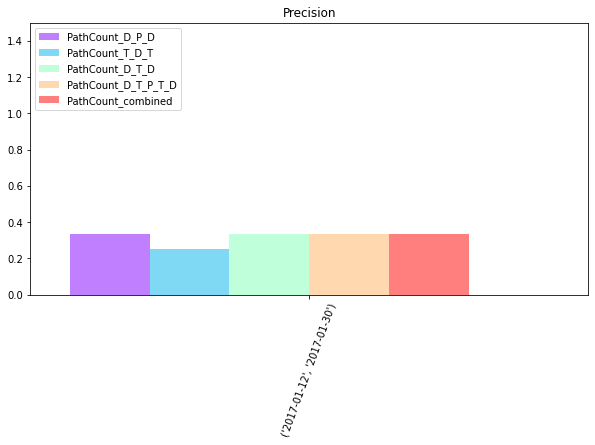

In [19]:
plt.clf()
plot_df = pd.DataFrame(ae.tw_precision,index= p)
plot_df = plot_df.loc[:, (plot_df != 0).any(axis=0)]
# Setting the positions and width for the bars
pos = list(range(plot_df.shape[0]))
width =1/(plot_df.shape[1]+1)
fig, ax = plt.subplots(figsize=(10,5))
colors = cm.rainbow(np.linspace(0,1,len(plot_df.columns)))
width_mult = 0
for column in plot_df.columns:
    plt.bar([p + (width*width_mult) for p in pos],
        #using df['pre_score'] data,
        plot_df[column],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color=colors[width_mult],
        # with label the first value in first_name
        #label=plot_df['first_name'][0])
        label = column
            )
    width_mult+=1
# trace = go.Scatter(x = p,y=ae.tw_precision[method],name=method)
#             traces.append(trace)
ax.set_xticks([p + 2.5 * width for p in pos])

# Set the labels for the x ticks
plt.xlim(min(pos)-width, max(pos)+(plot_df.shape[1]+1)*width)
plt.ylim([0, 1.5 ])
ax.set_xticklabels(plot_df.index)
plt.legend(plot_df.columns, loc='upper left')
# for method in methods:
#     if len(p)>len(ae.tw_precision[method]):
#         ae.tw_precision[method] = [0] + ae.tw_precision[method] # We add a zero because the first value is always zero(the beginning)
#     if np.asarray(ae.tw_precision[method]).sum()>0:
#         plt.plot(p, ae.tw_precision[method], label=method)
# trace = go.Scatter(x = p,y=ae.tw_precision[method],name=method)
#             traces.append(trace)
print("Current size:", plt.rcParams["figure.figsize"])
plt.legend(loc='upper left')
plt.title('Precision')
ax.tick_params(axis='x', rotation=70)
print(f'For the below time sessions, there where not enough data {empty_list}')
plt.show()

